# Crossover Point Determination

> [Return to Examples List](README.md)

This notebook demonstrates how to identify the crossover point from rheology results.

## Load Experiment Data

First, let's load the experiment data from a JSON file and convert it into a Pandas DataFrame.

In [1]:
# This is just to ensure you have the data file, downloaded from TA's website
from file_downloader import download_files

filename = "HR - PDMS.json"
file_path = download_files(filename, "files")[0]

In [2]:
from tadatakit.classes import Experiment

# Load the experiment data
experiment = Experiment.from_json(file_path)
df = experiment.get_dataframe("processed")

## Plotting The Data

We can plot the storage and loss moduli against angular frequency.

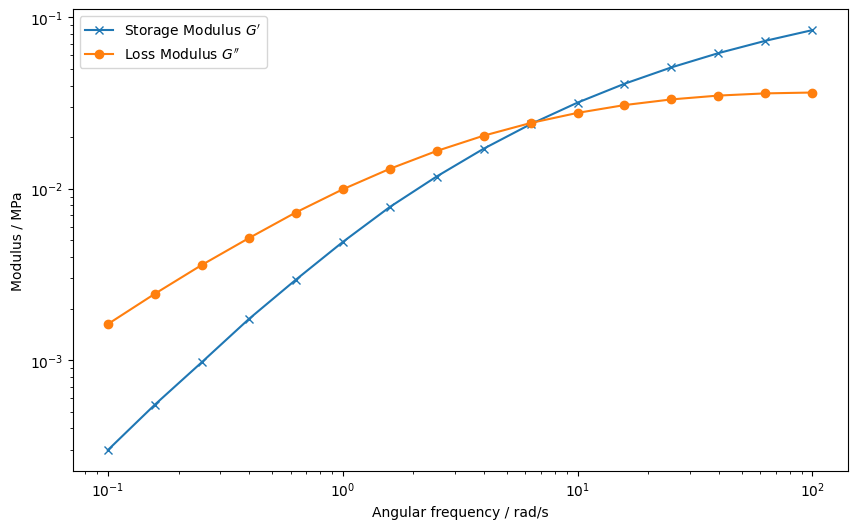

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.loglog(
    df["Angular frequency / rad/s"],
    df["Storage modulus / MPa"],
    marker='x',
    label="Storage Modulus $G^{\prime}$"
)
plt.loglog(
    df["Angular frequency / rad/s"],
    df["Loss modulus / MPa"],
    marker='o',
    label="Loss Modulus $G^{\prime\prime}$"
)

plt.legend()
plt.xlabel("Angular frequency / rad/s")
plt.ylabel("Modulus / MPa")
plt.show()

## Quantifying Crossover Point

Now we can perform a simple linear interpolation to quantify crossover modulus and frequency.

Crossover modulus: 0.0245 MPa
Crossover frequency: 6.60 rad/s


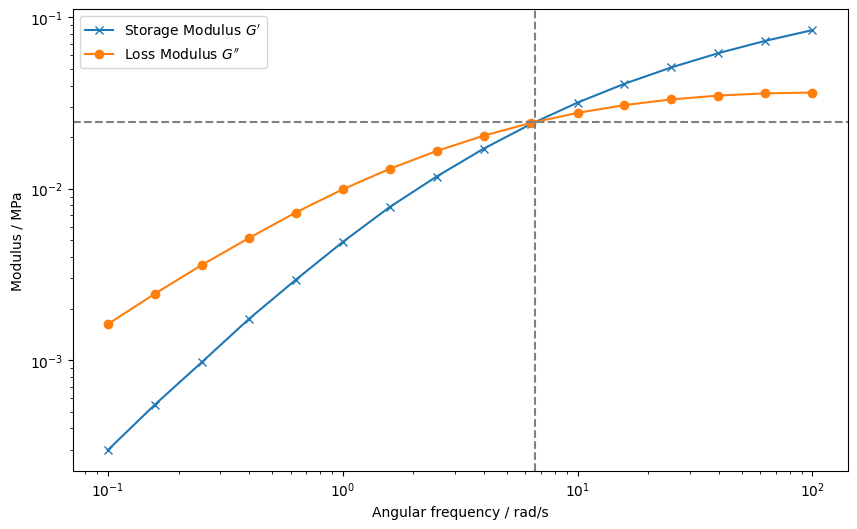

In [4]:
import numpy as np

sorted_df = df.sort_values('Angular frequency / rad/s')
log_angular_freq = np.log10(sorted_df['Angular frequency / rad/s'])
log_storage_modulus = np.log10(sorted_df['Storage modulus / MPa'])
log_loss_modulus = np.log10(sorted_df['Loss modulus / MPa'])

# Generate a finer grid for the angular frequency
fine_log_angular_freq = np.linspace(log_angular_freq.min(), log_angular_freq.max(), 1000)

# Interpolate the data
fine_log_storage_modulus = np.interp(fine_log_angular_freq, log_angular_freq, log_storage_modulus)
fine_log_loss_modulus = np.interp(fine_log_angular_freq, log_angular_freq, log_loss_modulus)

# Find the crossover point
difference = fine_log_storage_modulus - fine_log_loss_modulus
crossover_index = np.where(np.diff(np.sign(difference)))[0][0]
crossover_freq = 10**fine_log_angular_freq[crossover_index]
crossover_modulus = 10**fine_log_storage_modulus[crossover_index]

print(f"Crossover modulus: {crossover_modulus:.4f} MPa\nCrossover frequency: {crossover_freq:.2f} rad/s")

fig = plt.figure(figsize=(10,6))
plt.loglog(
    df["Angular frequency / rad/s"],
    df["Storage modulus / MPa"],
    marker='x',
    label="Storage Modulus $G^{\prime}$"
)
plt.loglog(
    df["Angular frequency / rad/s"],
    df["Loss modulus / MPa"],
    marker='o',
    label="Loss Modulus $G^{\prime\prime}$"
)
plt.axvline(crossover_freq, color='grey', linestyle="dashed")
plt.axhline(crossover_modulus, color='grey', linestyle="dashed")

plt.legend()
plt.xlabel("Angular frequency / rad/s")
plt.ylabel("Modulus / MPa")
plt.show()